# Text Classification Project
## By Mohit Bhar
In this project, firstly I got the data to work on from the site "http://archive.ics.uci.edu/ml/datasets/Twenty+Newsgroups". Basically, it contains 20 different fields like graphics, sports, etc. And corresponding to each field about 1000 documents were given. So, nearly 20,000 docs were given and corresponding to each document, it was given to which class they belong (by looking at the folder in which they are present). So, I splitted these docs in training and testing data, so firstly I trained the algorithm using the training input and output and then use the algorithm on the testing input to predict the results i.e. for a given testing document to which field it belongs. 

## Firstly, let get the data in required form
#### i.e. input X : numpy multidimensional array, output Y : numpy 1D array
We are given folder of docs, which will be needed to be transformed as X (numpy array) and field to which they belong is to be stored in the array named Y (output). 
So, formatting of the input and ouput is done in following steps

In [1]:
## To download stopwords
# import nltk
# nltk.download('stopwords')
# nltk.download('punkt')

In [2]:
# importying stopwords from python library
import nltk
from nltk.corpus import stopwords
# print(stopwords.words('english'))

# Libraries we need
import numpy as np
import re
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize  

In [3]:
def textCorrection(text):       # function to get desired words from a given text i.e. document after removal of stop words 
                                      # numbers and punctuations, and finally converting the words to their corresponding stem
                                      # words.
                                      # Argument text : string
                                      # Output : list containing strings (list containing words)
             
    def remove_numbers(text):         # function to remove numerical values in text, argument text: string       
        result = re.sub(r'\d+', '', text) 
        return result 
    
    def text_lowercase(text):         # function to convert each word to corresponding lowercase, argument text: string  
        return text.lower() 

    def remove_punctuation(text):     # function to remove punctuation from the text, argument text: string
        text = re.sub(r'[^\w\s]', ' ', text)  
        return text

    def stem(text_list):              # function to convert each word to its stem word, argument text: list of strings  
        porter = PorterStemmer()
        stemmed = [porter.stem(word) for word in text_list]
        return stemmed

    def removeStopWords(text):       # function to remove stop words from the text, argument text: string
        stop_words = set(stopwords.words('english'))    # making set of stopwords
        f = open("stop_words_english.txt", "r")         # opening the file in which more stop words are present 
        a=f.read()      
        s=a.split()               
        stop_words.update(s)                            # adding more stopwords to the stopwords containing set
        from nltk.tokenize import word_tokenize
        tokens = word_tokenize(text)                    # splitting the string by delimeter as space
        result_list=[]                                  # list for storing non-stopwords
        for word in tokens:                            
            if (word not in stop_words and len(word)>2) :        # if the current word is non-stopword then it is added
                result_list.append(word)                         # to the result_list
        
        return result_list                              # a list of string is returned
    text=remove_numbers(text)
    text=text_lowercase(text)
    text=remove_punctuation(text)
    text=removeStopWords(text)
    text=stem(text)
    return text

In [4]:
# Building features/vocabulary

import os 
  
path = "20_newsgroups"                     # path of the current folder in which all data (fields' folders) is present
dir_list = os.listdir(path)                # list to store all folders in the current folder (current directory)
doc_list=[]                                # this list is used for storing all the docs
for i in range(len(dir_list)):             # iterating over the all folders
    
    new_path="20_newsgroups"+"/"+dir_list[i]        # this is the path of a field folder where all docs (corresponding to the
                                                    # field) are present.
    doc_name_list = os.listdir(new_path)            # list of all docs in the field folder

    for curr_doc in doc_name_list:                  # iterating over each document
        f = open(new_path+"/"+curr_doc, "r")        # opening the current document   
        a=f.read()                                  # reading the current doc and storing its data as string in variable a
        doc_list.append((a,dir_list[i]))            # appending the doc_list with the data of the current doc(string)
    
print("Total Docs = ", len(doc_list))


Total Docs =  19997


In [5]:
d={}                                                # dictionary to store the words with their occuring frequencies
                                                    # i.e. d here is our vocabulary 
docs_data = [] 
for i in doc_list:                                  # iterating over all the documents 
    text_list_curr_doc = textCorrection(i[0])       # getting list of words after text refinement by calling textCorrection 
                                                    # method
    docs_data.append((text_list_curr_doc,i[1])) 
    for i in text_list_curr_doc:                    # iterating over each word so that if a word is already present in 
                                                    # vocabulary dictionary, then its count can be increased, else it can 
                                                    # be added to our vocabulary
        if i not in d:
            d[i] = 1
        else:
            d[i] = d[i] + 1

            
print("Total words in vocabulary =",len(d))

Total words in vocabulary = 109723


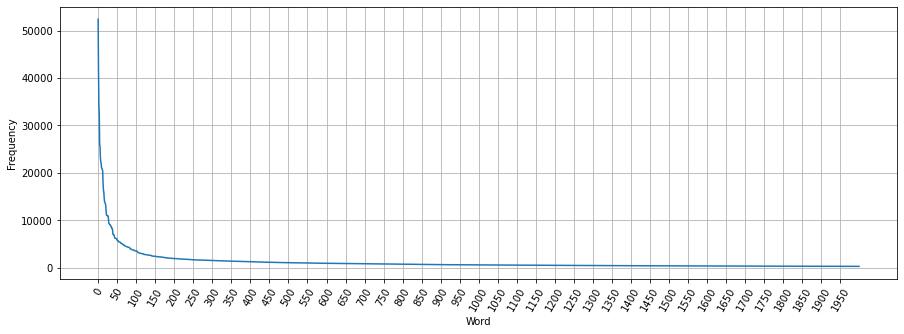

In [6]:
frequency = np.array([i for i in d.values()])             # Count of each word is present as value in dictionary
words_array = np.array([i for i in d.keys()])             # words are present as key in dictionary
words_sorted =words_array[np.argsort(frequency)][::-1]    # sorting words according to their frequency
frequency =np.sort(frequency)[::-1]                       # sorting the frequency
#### printing the graph
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
l=0
u=2000
plt.plot(np.arange(len(frequency))[l:u], frequency[l:u])
plt.xticks(np.arange(l, u, 50), rotation=60)
plt.grid()
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.show()

In [7]:
features=words_sorted[10:5000]   # setting the features to be the top 5000 words, not taking top 10 words as they will appear
                                 # in all different docs (docs belonging to different fields)
print("-----------------------------------------WORDS SELECTED AS FEATURES-----------------------------------------")
print("NOTE: We have transformed each word to their corresponding stem word")
for i in features:
    print(i,(20-len(i))*" ",end ="")

-----------------------------------------WORDS SELECTED AS FEATURES-----------------------------------------
NOTE: We have transformed each word to their corresponding stem word
date                 organ                path                 gmt                  write                ohio                 refer                articl               talk                 post                 comp                 misc                 an                   sender               howland              univers              reston               peopl                nntp                 window               mp                   polit                host                 time                 sci                  system               usenet               zaphod               alt                  rutger               christian            harvard              eng                  rec                  crabappl             noc                  sei                  soc                  da                   xre

In [8]:
def get_X_Y(docs_data,features):                 # To get desired X and Y that can be send to our algorithm, X we need as
                                                 # n-m dimensional numpy array, and Y as 1D numpy array
                                                 # Arguments : doc_list : list having its each elements as tuple, first value 
                                                 #                      of tuple is the list containing words(after refinement)
                                                 #                      corresponding to a doc, and 2nd value is the field to 
                                                 #                      which the doc belongs like sports, graphics etc.
                                                 #             features : list of words from vocubalory which are taken as 
                                                 #                      features here top 5000 words means 5000 features
                                                 # Output : X,Y : X is numpy multidimensional array, Y is 1d numpy array
                                                                            
    X=np.zeros((len(docs_data),len(features)))      # to making n-m dimensional X numpy array, all values initialized to 0, 
                                                    # for storing the X data
    Y=[]                                            # array for storing output i.e. field name corresponding to each 
                                                    # document i.e each row of X
    
    for i in range(len(doc_list)):
        Y.append(doc_list[i][1])
    
    Y=np.array(Y)

    for i in range(len(docs_data)):                 # iterating over each doc, so that each doc can be added as row in X
        text_list_curr_doc = docs_data[i][0]        # list of words in current doc (after text refinement)
        for word in text_list_curr_doc:             # iterating over each word in the current doc 
            if word in features:                    # if the current word is in our features, then corresponding feature column
                                                    # value is increased by 1
                index = np.where(features==word)
                X[i][index] = X[i][index] + 1  
    return X, Y                                     # X, Y are returned

X,Y = get_X_Y(docs_data, features)          # getting X and Y as numpy arrays
print("X :",X.shape)
print("Y :",Y.shape)

X : (19997, 4990)
Y : (19997,)


## Now, we have the required format of X and Y

# Writing Self Implemented Algorithm for Multinomial Naive Bayes

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(X,Y,random_state=1) # splitting into testing and training data

def fit(x_train,y_train):                           # method for training the algorithm
                                                    # Arguments : x_train: numpy multidimensional array
                                                    #             y_train: numpy 1D array
    
    #### creating the dictionary 
    result={}
    all_classes=set(y_train)
    result["total_docs"]=len(y_train)
    
    for current_class in all_classes:               # iterating over each field
        result[current_class]={}                    # adding class/field as key in dictionary
        y_for_current_class = y_train==current_class
        x_train_current_class=x_train[y_for_current_class]
        y_train_current_class=y_train[y_for_current_class]
        
        features=x_train.shape[1]                   # representing features with numerics as 0,1,2....
        result[current_class]["field_length"]=len(y_train_current_class)                # length of y_train belonging to current
                                                                                        # field/class
        result[current_class]["total_count"]=sum(x_train_current_class.sum(axis=1))   # storing count of each class/field 
        
        for j in range(features):                             # iterating over features for adding count
            count=(x_train_current_class[:,j]).sum()          
            result[current_class][j]=count
        
    return result;

dictionary = fit(x_train, y_train)

In [10]:
def probablity(dictionary,cls,x):
    output=np.log(dictionary[cls]["field_length"]/dictionary["total_docs"]) #output will store the probability, actually not the
                                                                         # probability as we will use log(p), so it is 
                                                                         # equivalent to the probablity
    total_features=len(dictionary[cls].keys())-2   # getting number of features, subtracting 2 as we have added to more keys to
                                                   # our dictionary that are "field_length" and "total_classes"
        
    for j in range(total_features):                
        
        if x[j]==0:                                # if occurance of feature is 0, then we will not use it for probability 
            continue
        #### LAPLACE CORRECTION
        each_word_count_per_class = dictionary[cls].get(j,0) + 1   
        total_words_count = dictionary[cls]["total_count"] + total_features  
        
        prob_of_current_word = np.log(each_word_count_per_class/total_words_count) 
        output += prob_of_current_word           # updating the output value, as log is taken so instead of multiplication 
                                                 # we are adding the things
            
    return output                                # returning output which is equivalent to probability

def predictSinglePoint(dictionary, x):           # method to predicting for single document
    total_class = dictionary.keys()              # total possible fields/class
    best_prob = 0                                # storing the probability of best predicated class/field for the current doc
    best_pred_class = 0                          # storing the best predicated class/field for the current doc
    first_run = True                        
    for curr_class in total_class:               # iterating over each class and calculating the probability of current doc will
                                                 # belong to the current class/field
        if (curr_class == "total_docs"):         # total_docs is not any field, but it is a key in the dictionary, so it need to
                                                 # be skipped
            continue
        p_curr = probablity(dictionary, curr_class, x) # calculating the probability that current doc belongs to the current 
                                                       # iterated field
        if (first_run or best_prob < p_curr):    # if the probability is more than the current field then the values are need
                                                 # be updated
            best_prob = p_curr
            best_pred_class = curr_class
        first_run=False
    return best_pred_class                       # returning the best predicated class/field for the current doc

def predict(dictionary,x_test):                  # method for getting the predictions for all the documents
                                                 # Arguments: dictionary : dictionary returned by fit() method
                                                 #            x_test : multidimensional numpy array
    
    pred_list=[]                                 # list for storing the predictions of each doc
    for row in x_test:                           # iterating over each doc
        class_pred=predictSinglePoint(dictionary,row)       # predicting best class/field for current doc
        pred_list.append(class_pred)                        # appending the list by the prediction of the current doc
    return pred_list                             # returning the list of predictions

def score(Y_test,Y_pred):                        # method for predicting the scores by comparing the y_test and y_predicted
                                                 # Arguments : y_test: numpy 1D array
                                                 #             y_pred: 1D list or numpy 1D array
        count = 0
        for i in range(len(Y_test)):             # iterating over each prediction
            if Y_test[i] == y_pred[i]:           # comparing the prediction with the actual value, if it matches than the count
                                                 # is increased by 1
                count+=1
        return count/len(y_pred)                 # score = (correct predictions)/(total predictions)
y_pred = predict(dictionary, x_test)

In [11]:
BOLD = '\x1b[1;30;30m'                           # for printing purposes
END = '\x1b[0m'                                  # for printing purposes

#### Printing the results for self implemented algorithm
print(BOLD," "*20,"SCORE FOR TESTING DATA USING SELF IMPLEMENTED ALGORITHM: ",score(y_test,y_pred),END)
print("")
from sklearn.metrics import classification_report, confusion_matrix
print(BOLD,"--"*16,"CLASSIFICATION REPORT","--"*16,END)
print(classification_report(y_test, y_pred))
print(BOLD,"--"*16,"CONFUSION MATRIX","--"*16,END)
print(confusion_matrix(y_test, y_pred))

                      SCORE FOR TESTING DATA USING SELF IMPLEMENTED ALGORITHM:  0.904 

 -------------------------------- CLASSIFICATION REPORT -------------------------------- 
                          precision    recall  f1-score   support

             alt.atheism       0.78      0.89      0.84       261
           comp.graphics       0.79      0.87      0.83       248
 comp.os.ms-windows.misc       0.91      0.84      0.88       253
comp.sys.ibm.pc.hardware       0.83      0.86      0.85       260
   comp.sys.mac.hardware       0.86      0.95      0.91       266
          comp.windows.x       0.95      0.81      0.87       265
            misc.forsale       0.90      0.94      0.92       252
               rec.autos       0.94      0.93      0.93       223
         rec.motorcycles       0.98      0.97      0.97       293
      rec.sport.baseball       0.99      0.98      0.99       245
        rec.sport.hockey       0.99      0.98      0.98       247
               sci.crypt     

#### Here, Score on testing data = 0.904. So, score is really good, this means that our algorithm is performing well. 

# Now, we will make predictions using sklearn 

In [14]:
from sklearn.naive_bayes import MultinomialNB

alg = MultinomialNB()
alg.fit(x_train, y_train)

pred_using_sklearn = alg.predict(x_test)
#### Printing the results for sklearn MultinomialNB

print(BOLD," "*30,"SCORE FOR TESTING DATA USING SKLEARN: ",alg.score(x_test,y_test),END)
print()
print(BOLD,"--"*15,"CLASSIFICATION REPORT FOR SKLEARN PREDICTIONS","--"*15,END)
print(classification_report(y_test,pred_using_sklearn))

print(BOLD,"--"*15,"CONFUSION MATRIX FOR SKLEARN PREDICTIONS","--"*15,END)
print(confusion_matrix(y_test,pred_using_sklearn))


                                SCORE FOR TESTING DATA USING SKLEARN:  0.887 

 ------------------------------ CLASSIFICATION REPORT FOR SKLEARN PREDICTIONS ------------------------------ 
                          precision    recall  f1-score   support

             alt.atheism       0.82      0.85      0.84       261
           comp.graphics       0.82      0.80      0.81       248
 comp.os.ms-windows.misc       0.84      0.81      0.82       253
comp.sys.ibm.pc.hardware       0.76      0.81      0.78       260
   comp.sys.mac.hardware       0.84      0.92      0.88       266
          comp.windows.x       0.92      0.81      0.86       265
            misc.forsale       0.83      0.90      0.86       252
               rec.autos       0.88      0.91      0.89       223
         rec.motorcycles       0.97      0.97      0.97       293
      rec.sport.baseball       0.98      0.96      0.97       245
        rec.sport.hockey       0.97      0.97      0.97       247
               sci

## RESULT
#### score for testing data using self implemented algorithm : 0.904
#### score for testing data using sklearn MultinomialNB         : 0.887

So, self implemented algorithm is performing well, also it's performing better than the inbuilt sklearn MultinomialNB. 